In [1]:
import pandas
from matplotlib import pyplot as pl
import numpy as np
training_fname = 'data/PrediqtTrainData.csv'
airports_fname = 'data/PrediqtAirports.csv'
testing_fname = 'data/PrediqtTestDataSmall.csv'

In [2]:
training_data = pandas.read_csv(training_fname)

In [3]:
training_data = training_data.sort_index(by='PRICE')

In [4]:
prices = training_data.PRICE

In [5]:
for i, price in enumerate(prices):
    print price
    if i > 10:
        break

0.01
6.73
8.28
8.33
8.35
8.35
8.66
8.72
8.74
8.84
8.84
8.9


In [6]:
price_counts = prices.value_counts(sort=False)

In [7]:
num_prices = len(prices)
num_buckets = 150.
buckets = [0.]
running_total = 0
for price, count in price_counts.sort_index().iteritems():
    running_total += count
    if running_total >= num_prices / num_buckets:
        buckets.append(price)
        running_total = 0
buckets.append(price * 1.01)
print buckets

[0.0, 42.18, 54.600000000000001, 65.359999999999999, 75.280000000000001, 84.540000000000006, 93.620000000000005, 101.38, 109.23, 117.3, 124.98, 132.22, 139.58000000000001, 145.97999999999999, 151.97999999999999, 158.28999999999999, 163.84999999999999, 169.80000000000001, 174.24000000000001, 179.97999999999999, 185.36000000000001, 190.19, 195.62, 199.97999999999999, 204.97999999999999, 209.97999999999999, 215.34, 219.97999999999999, 225.08000000000001, 229.97999999999999, 235.36000000000001, 239.97999999999999, 245.40000000000001, 250.0, 256.05000000000001, 260.98000000000002, 268.86000000000001, 273.87, 279.98000000000002, 287.75999999999999, 294.49000000000001, 300.98000000000002, 309.98000000000002, 319.26999999999998, 326.98000000000002, 335.69, 343.48000000000002, 353.5, 362.98000000000002, 374.48000000000002, 385.13999999999999, 397.82999999999998, 409.98000000000002, 423.30000000000001, 437.98000000000002, 451.60000000000002, 466.51999999999998, 480.87, 496.33999999999997, 510.24

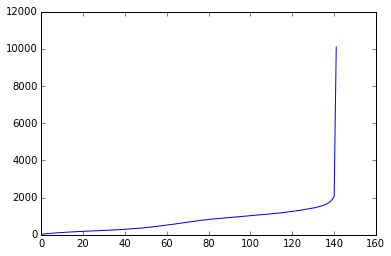

In [8]:
%matplotlib inline
from matplotlib import pyplot as pl
pl.plot(buckets)
pl.show()

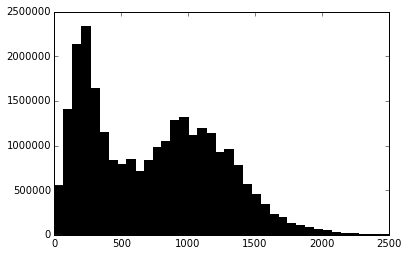

In [9]:
pl.hist(prices, num_buckets, color='black')
pl.xlim([0, 2500])
pl.show()

In [10]:
bucket_counts = [0 for __ in xrange(int(num_buckets) + 1)]
bucket_ranges = zip(xrange(int(num_buckets) + 1), buckets, buckets[1:])
print len(prices)
for i_, price in enumerate(prices):
    for i, low, high in bucket_ranges:
        if low <= price <= high:
            bucket_counts[i] += 1
            break
    if bucket_ranges[0][-1] < price:
        bucket_ranges = bucket_ranges[1:]
        print 'adjusting range', bucket_ranges[0]

26454134
adjusting range (1, 42.18, 54.600000000000001)
adjusting range (2, 54.600000000000001, 65.359999999999999)
adjusting range (3, 65.359999999999999, 75.280000000000001)
adjusting range (4, 75.280000000000001, 84.540000000000006)
adjusting range (5, 84.540000000000006, 93.620000000000005)
adjusting range (6, 93.620000000000005, 101.38)
adjusting range (7, 101.38, 109.23)
adjusting range (8, 109.23, 117.3)
adjusting range (9, 117.3, 124.98)
adjusting range (10, 124.98, 132.22)
adjusting range (11, 132.22, 139.58000000000001)
adjusting range (12, 139.58000000000001, 145.97999999999999)
adjusting range (13, 145.97999999999999, 151.97999999999999)
adjusting range (14, 151.97999999999999, 158.28999999999999)
adjusting range (15, 158.28999999999999, 163.84999999999999)
adjusting range (16, 163.84999999999999, 169.80000000000001)
adjusting range (17, 169.80000000000001, 174.24000000000001)
adjusting range (18, 174.24000000000001, 179.97999999999999)
adjusting range (19, 179.979999999999

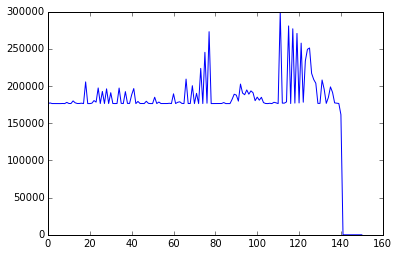

In [11]:
%matplotlib inline
pl.plot(bucket_counts)
pl.show()

In [12]:
num_bins = 150
out, bins = pandas.qcut(prices, num_bins, retbins=True)

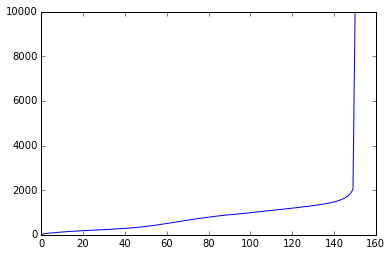

In [13]:
%matplotlib inline
pl.plot(bins)
pl.show()

In [14]:
bin_counts = [0 for __ in xrange(int(num_bins) + 1)]
bin_ranges = zip(xrange(int(num_bins) + 1), bins, bins[1:])
print len(prices)
for i_, price in enumerate(prices):
    for i, low, high in bin_ranges:
        if low < price <= high:
            bin_counts[i] += 1
            break
    if bin_ranges[0][-1] < price:
        bin_ranges = bin_ranges[1:]
        print 'adjusting range', bin_ranges[0]

26454134
adjusting range (1, 42.18, 54.600000000000001)
adjusting range (2, 54.600000000000001, 65.290000000000006)
adjusting range (3, 65.290000000000006, 75.230000000000004)
adjusting range (4, 75.230000000000004, 84.480000000000004)
adjusting range (5, 84.480000000000004, 93.569999999999993)
adjusting range (6, 93.569999999999993, 101.31999999999999)
adjusting range (7, 101.31999999999999, 109.17)
adjusting range (8, 109.17, 117.23999999999999)
adjusting range (9, 117.23999999999999, 124.98)
adjusting range (10, 124.98, 132.05000000000001)
adjusting range (11, 132.05000000000001, 139.41)
adjusting range (12, 139.41, 145.96000000000001)
adjusting range (13, 145.96000000000001, 151.88)
adjusting range (14, 151.88, 157.97999999999999)
adjusting range (15, 157.97999999999999, 163.44)
adjusting range (16, 163.44, 169.41)
adjusting range (17, 169.41, 173.97999999999999)
adjusting range (18, 173.97999999999999, 179.97999999999999)
adjusting range (19, 179.97999999999999, 183.97999999999999

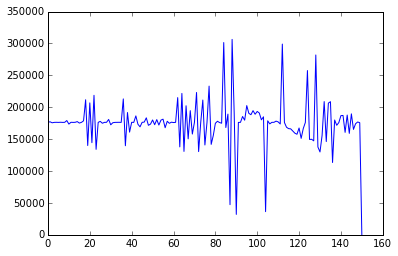

In [15]:
%matplotlib inline
pl.plot(bin_counts)
pl.show()

I think bucket_counts looks better than bin_counts.

In [16]:
print buckets

[0.0, 42.18, 54.600000000000001, 65.359999999999999, 75.280000000000001, 84.540000000000006, 93.620000000000005, 101.38, 109.23, 117.3, 124.98, 132.22, 139.58000000000001, 145.97999999999999, 151.97999999999999, 158.28999999999999, 163.84999999999999, 169.80000000000001, 174.24000000000001, 179.97999999999999, 185.36000000000001, 190.19, 195.62, 199.97999999999999, 204.97999999999999, 209.97999999999999, 215.34, 219.97999999999999, 225.08000000000001, 229.97999999999999, 235.36000000000001, 239.97999999999999, 245.40000000000001, 250.0, 256.05000000000001, 260.98000000000002, 268.86000000000001, 273.87, 279.98000000000002, 287.75999999999999, 294.49000000000001, 300.98000000000002, 309.98000000000002, 319.26999999999998, 326.98000000000002, 335.69, 343.48000000000002, 353.5, 362.98000000000002, 374.48000000000002, 385.13999999999999, 397.82999999999998, 409.98000000000002, 423.30000000000001, 437.98000000000002, 451.60000000000002, 466.51999999999998, 480.87, 496.33999999999997, 510.24

In [17]:
len(buckets)

142

In [18]:
step = 1 / 142.
print step
bucket_ranges = zip(buckets, buckets[1:])
def convert(num):
    cumsum = 0
    for low, high in bucket_ranges:
        if cumsum <= num < cumsum + step:
            t = (num - cumsum) / step
            return (1 - t) * low + t * high
        cumsum += step
    t = (num - (cumsum - step)) / step
    return (1 - t) * low + t * high

0.00704225352113


In [19]:
print convert(.992)
print convert(.9925)
print convert(.993)
print convert(.9935)

9005.4656576
9576.792604
10148.1195504
10719.4464968


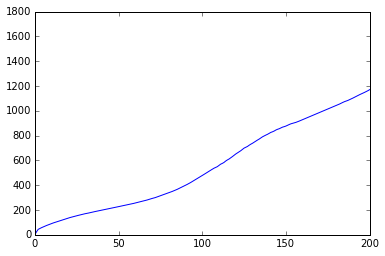

In [20]:
%matplotlib inline
pl.plot([convert(i / 250.) for i in xrange(250)])
pl.xlim([0, 200])
pl.ylim([0, 1800])
pl.show()

In [21]:
training_data['OUTBOUND_DATE'] = training_data['OUTBOUND_DATE'].astype('datetime64')

In [22]:
training_data['INBOUND_DATE'] = training_data['INBOUND_DATE'].astype('datetime64')

In [23]:
training_data['SEARCH_DATEHOUR'] = training_data['SEARCH_DATEHOUR'].astype('datetime64[ns]')

In [24]:
training_data['SEARCH_TO_OUTBOUND'] = training_data.OUTBOUND_DATE - training_data.SEARCH_DATEHOUR

In [25]:
training_data['SEARCH_TO_INBOUND'] = training_data.INBOUND_DATE - training_data.SEARCH_DATEHOUR

In [26]:
training_data['OUTBOUND_TO_INBOUND'] = training_data.INBOUND_DATE - training_data.OUTBOUND_DATE

In [27]:
airports_data = pandas.read_csv(airports_fname)

In [28]:
training_merged = pandas.merge(training_data, airports_data, left_on='ORIGIN', right_on='AIRPORT')
del training_data

In [29]:
del training_merged['AIRPORT']
training_merged.head()

,SEARCH_DATEHOUR,ORIGIN,DESTINATION,OUTBOUND_DATE,INBOUND_DATE,PRICE,MARKETS,SEARCH_TO_OUTBOUND,SEARCH_TO_INBOUND,OUTBOUND_TO_INBOUND,CITY,COUNTRY,CONTINENT,LATITUDE,LONGITUDE,TRAFFIC
0,2016-01-04 23:00:00,CGN,BGY,2016-03-25,2016-03-27,0.01,DE,80 days 01:00:00,82 days 01:00:00,2 days,CGN,DE,EU,50.865833,7.141944,1457815
1,2016-01-05 17:00:00,CGN,BGY,2016-01-12,2016-01-13,15.82,IT,6 days 07:00:00,7 days 07:00:00,1 days,CGN,DE,EU,50.865833,7.141944,1457815
2,2016-01-05 11:00:00,CGN,BGY,2016-01-22,2016-01-25,15.82,IT,16 days 13:00:00,19 days 13:00:00,3 days,CGN,DE,EU,50.865833,7.141944,1457815
3,2016-01-08 08:00:00,CGN,BGY,2016-01-28,2016-02-01,15.82,IT,19 days 16:00:00,23 days 16:00:00,4 days,CGN,DE,EU,50.865833,7.141944,1457815
4,2016-01-05 17:00:00,CGN,SXF,2016-01-19,2016-01-22,15.96,ES,13 days 07:00:00,16 days 07:00:00,3 days,CGN,DE,EU,50.865833,7.141944,1457815


In [30]:
for key in ('CITY', 'COUNTRY', 'CONTINENT', 'LATITUDE', 'LONGITUDE', 'TRAFFIC'):
    training_merged['ORIGIN_' + key] = training_merged[key]
    del training_merged[key]

In [31]:
training_merged = pandas.merge(training_merged, airports_data, left_on='DESTINATION', right_on='AIRPORT')
del training_merged['AIRPORT']
for key in ('CITY', 'COUNTRY', 'CONTINENT', 'LATITUDE', 'LONGITUDE', 'TRAFFIC'):
    training_merged['DESTINATION_' + key] = training_merged[key]
    del training_merged[key]
training_merged.head()

,SEARCH_DATEHOUR,ORIGIN,DESTINATION,OUTBOUND_DATE,INBOUND_DATE,PRICE,MARKETS,SEARCH_TO_OUTBOUND,SEARCH_TO_INBOUND,OUTBOUND_TO_INBOUND,...,ORIGIN_CONTINENT,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,ORIGIN_TRAFFIC,DESTINATION_CITY,DESTINATION_COUNTRY,DESTINATION_CONTINENT,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DESTINATION_TRAFFIC
0,2016-01-04 23:00:00,CGN,BGY,2016-03-25,2016-03-27,0.01,DE,80 days 01:00:00,82 days 01:00:00,2 days,...,EU,50.865833,7.141944,1457815,MIL,IT,EU,45.668333,9.700278,2175706
1,2016-01-05 17:00:00,CGN,BGY,2016-01-12,2016-01-13,15.82,IT,6 days 07:00:00,7 days 07:00:00,1 days,...,EU,50.865833,7.141944,1457815,MIL,IT,EU,45.668333,9.700278,2175706
2,2016-01-05 11:00:00,CGN,BGY,2016-01-22,2016-01-25,15.82,IT,16 days 13:00:00,19 days 13:00:00,3 days,...,EU,50.865833,7.141944,1457815,MIL,IT,EU,45.668333,9.700278,2175706
3,2016-01-08 08:00:00,CGN,BGY,2016-01-28,2016-02-01,15.82,IT,19 days 16:00:00,23 days 16:00:00,4 days,...,EU,50.865833,7.141944,1457815,MIL,IT,EU,45.668333,9.700278,2175706
4,2016-01-08 15:00:00,CGN,BGY,2016-01-24,2016-01-25,15.98,IT,15 days 09:00:00,16 days 09:00:00,1 days,...,EU,50.865833,7.141944,1457815,MIL,IT,EU,45.668333,9.700278,2175706


In [32]:
training_merged = training_merged.sort('PRICE')

In [33]:
for key in (
    'ORIGIN', 'DESTINATION', 'ORIGIN_CITY', 'ORIGIN_COUNTRY', 
    'ORIGIN_CONTINENT', 'DESTINATION_CITY', 'DESTINATION_COUNTRY', 
    'DESTINATION_CONTINENT',
):
    training_merged[key] = training_merged[key].astype('category')
training_merged.head()

,SEARCH_DATEHOUR,ORIGIN,DESTINATION,OUTBOUND_DATE,INBOUND_DATE,PRICE,MARKETS,SEARCH_TO_OUTBOUND,SEARCH_TO_INBOUND,OUTBOUND_TO_INBOUND,...,ORIGIN_CONTINENT,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,ORIGIN_TRAFFIC,DESTINATION_CITY,DESTINATION_COUNTRY,DESTINATION_CONTINENT,DESTINATION_LATITUDE,DESTINATION_LONGITUDE,DESTINATION_TRAFFIC
0,2016-01-04 23:00:00,CGN,BGY,2016-03-25,2016-03-27,0.01,DE,80 days 01:00:00,82 days 01:00:00,2 days,...,EU,50.865833,7.141944,1457815,MIL,IT,EU,45.668333,9.700278,2175706
322421,2016-01-05 08:00:00,SXF,BCN,2016-01-07,2016-01-11,6.73,DE,1 days 16:00:00,5 days 16:00:00,4 days,...,EU,52.366667,13.500000,2004850,BCN,ES,EU,41.302778,2.094444,11070347
92969,2016-01-03 12:00:00,RYG,STN,2016-01-20,2016-01-27,8.28,NO,16 days 12:00:00,23 days 12:00:00,7 days,...,EU,59.378900,10.785600,278640,LON,UK,EU,51.883333,0.233333,7335708
286879,2016-01-04 22:00:00,GDN,WMI,2016-02-03,2016-02-10,8.33,IT,29 days 02:00:00,36 days 02:00:00,7 days,...,EU,54.376558,18.470078,673931,WAW,PL,EU,52.460298,20.657294,932470
901765,2016-01-04 18:00:00,WMI,GDN,2016-02-03,2016-02-10,8.35,FR,29 days 06:00:00,36 days 06:00:00,7 days,...,EU,52.460298,20.657294,932470,GDN,PL,EU,54.376558,18.470078,673931


In [34]:
training_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26454134 entries, 0 to 24517283
Data columns (total 22 columns):
SEARCH_DATEHOUR          datetime64[ns]
ORIGIN                   category
DESTINATION              category
OUTBOUND_DATE            datetime64[ns]
INBOUND_DATE             datetime64[ns]
PRICE                    float64
MARKETS                  object
SEARCH_TO_OUTBOUND       timedelta64[ns]
SEARCH_TO_INBOUND        timedelta64[ns]
OUTBOUND_TO_INBOUND      timedelta64[ns]
ORIGIN_CITY              category
ORIGIN_COUNTRY           category
ORIGIN_CONTINENT         category
ORIGIN_LATITUDE          float64
ORIGIN_LONGITUDE         float64
ORIGIN_TRAFFIC           int64
DESTINATION_CITY         category
DESTINATION_COUNTRY      category
DESTINATION_CONTINENT    category
DESTINATION_LATITUDE     float64
DESTINATION_LONGITUDE    float64
DESTINATION_TRAFFIC      int64
dtypes: category(8), datetime64[ns](3), float64(5), int64(2), object(1), timedelta64[ns](3)
memory usage: 3.3+ 

In [35]:
training_merged.to_pickle('my_data/TrainingMerged.pickle')

In [36]:
try:
    training_merged
except NameError:
    training_merged = pandas.from_pickle('my_data/TrainingMerged.pickle')
sample = training_merged.sample(100)

In [37]:
sample.to_csv('my_data/TrainingMerged.Sample.100.csv')

In [38]:
markets = training_merged.MARKETS

248


In [39]:
from collections import Counter
market_counts = Counter(
    market
    for __, marketlist in 
    markets.iteritems()
    for market in
    marketlist.split(';')
)
print market_counts.most_common(10)

[('**', 18219716), ('UK', 2579553), ('US', 1127899), ('FR', 801495), ('IT', 799988), ('DE', 771715), ('ES', 753441), ('SK', 557629), ('TR', 537822), ('AT', 522223)]


In [41]:
len(market_counts)

248

In [42]:
most_common_markets = [market for market, __ in market_counts.most_common(199)]
print most_common_markets

['**', 'UK', 'US', 'FR', 'IT', 'DE', 'ES', 'SK', 'TR', 'AT', 'PT', 'PL', 'RU', 'IE', 'HU', 'CZ', 'GR', 'BR', 'BG', 'NL', 'RO', 'CH', 'TW', 'HK', 'MT', 'IL', 'BE', 'SA', 'CA', 'KW', 'MO', 'SI', 'QA', 'KZ', 'BH', 'OM', 'IS', 'BY', 'GE', 'ME', 'MD', 'LB', 'AZ', 'AD', 'SM', 'VA', 'HR', 'LI', 'BA', 'GL', 'FO', 'MK', 'KO', 'BV', 'MN', 'LU', 'WF', 'TF', 'BN', 'WS', 'GU', 'PW', 'PG', 'PN', 'MP', 'FJ', 'FM', 'VU', 'NU', 'CK', 'CC', 'CX', 'KH', 'SB', 'TV', 'TO', 'TL', 'TK', 'AS', 'LK', 'MV', 'BT', 'BQ', 'GS', 'HM', 'MH', 'UM', 'IO', 'MS', 'NF', 'CW', 'SX', 'KI', 'SJ', 'LA', 'AN', 'AQ', 'MC', 'RS', 'AL', 'TM', 'UZ', 'KG', 'TJ', 'AM', 'IN', 'GI', 'TH', 'KR', 'NZ', 'MY', 'LT', 'LV', 'EE', 'RE', 'SC', 'KM', 'YT', 'ST', 'ID', 'MU', 'MX', 'SH', 'SS', 'PF', 'NC', 'NR', 'NP', 'BL', 'PM', 'VN', 'GG', 'PE', 'JO', 'YE', 'IQ', 'JP', 'MM', 'VG', 'FK', 'BB', 'BM', 'BS', 'BZ', 'GY', 'GD', 'SV', 'AI', 'AW', 'KY', 'SR', 'KN', 'DM', 'LC', 'TT', 'TC', 'VC', 'AG', 'VI', 'CO', 'PS', 'AU', 'PK', 'AF', 'CL', 'BD', 'JM

In [43]:
market_onehots = []
for i, marketlist in enumerate(markets):
    onehot = np.zeros(200, dtype='bool')
    ms = marketlist.split(';')
    for m in ms:
        try:
            onehot[most_common_markets.index(m)] = True
        except ValueError:
            onehot[-1] = True
    market_onehots.append(onehot)
    if not i % 1000000:
        print i

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000


In [44]:
training_merged.MARKETS.tail(2)

13186256                                                 DE
24517283    BG;AT;TR;ES;RO;IE;BE;HU;PL;CH;FR;PT;IT;CZ;GR;SK
Name: MARKETS, dtype: object

In [45]:
sum(market_onehots[-1])

16

In [46]:
sum(market_onehots[-2])

1

In [47]:
training_merged['MARKETS'] = market_onehots

In [48]:
training_merged.MARKETS.head()

0         [False, False, False, False, False, True, Fals...
322421    [False, False, False, False, False, True, Fals...
92969     [False, False, False, False, False, False, Fal...
286879    [False, False, False, False, True, False, Fals...
901765    [False, False, False, True, False, False, Fals...
Name: MARKETS, dtype: object

In [49]:
training_merged.dtypes

SEARCH_DATEHOUR           datetime64[ns]
ORIGIN                          category
DESTINATION                     category
OUTBOUND_DATE             datetime64[ns]
INBOUND_DATE              datetime64[ns]
PRICE                            float64
MARKETS                           object
SEARCH_TO_OUTBOUND       timedelta64[ns]
SEARCH_TO_INBOUND        timedelta64[ns]
OUTBOUND_TO_INBOUND      timedelta64[ns]
ORIGIN_CITY                     category
ORIGIN_COUNTRY                  category
ORIGIN_CONTINENT                category
ORIGIN_LATITUDE                  float64
ORIGIN_LONGITUDE                 float64
ORIGIN_TRAFFIC                     int64
DESTINATION_CITY                category
DESTINATION_COUNTRY             category
DESTINATION_CONTINENT           category
DESTINATION_LATITUDE             float64
DESTINATION_LONGITUDE            float64
DESTINATION_TRAFFIC                int64
dtype: object

In [ ]:
def make_onehot(df, field, size):
    series = df[field]
    counts = Counter(series)
    print len(counts)
    most_common = [item for item, __ in counts.most_common(size)]
    print most_common
    most_common_set = frozenset(most_common)
    excluded = sum(place not in most_common_set for place in series) / float(len(series))
    print excluded
    onehots = []
    np_zeros = np.zeros
    most_common_index = most_common.index
    onehots_append = onehots.append
    zeros_size = len(most_common) + (1 if excluded > 0 else 0)
    for i, item in enumerate(series):
        onehot = np_zeros(zeros_size, dtype='bool')
        try:
            onehot[most_common_index(item)] = True
        except ValueError:
            onehot[-1] = True
        onehots_append(onehot)
        if not i % 1000000:
            print i
    df[field] = onehots
    return df

In [ ]:
pairs = {
    'ORIGIN': 499,
    'ORIGIN_CITY': 499,
    'ORIGIN_COUNTRY': 49,
    'ORIGIN_CONTINENT': 6,
    'DESTINATION': 499,
    'DESTINATION_CITY': 499,
    'DESTINATION_COUNTRY': 99,
    'DESTINATION_CONTINENT': 6,
}
for field, size in pairs.iteritems():
    print field
    training_merged = make_onehot(training_merged, field, size)

ORIGIN
2483
['MAN', 'LHR', 'FRA', 'LGW', 'CDG', 'AMS', 'MAD', 'BHX', 'DUS', 'MUC', 'STN', 'MXP', 'BRU', 'GLA', 'SVO', 'FCO', 'HAM', 'BCN', 'GRU', 'IST', 'GIG', 'ZRH', 'MEX', 'CGN', 'STR', 'EMA', 'YYZ', 'DUB', 'CUN', 'TXL', 'DME', 'CPH', 'NCL', 'ATH', 'VCE', 'VIE', 'LIS', 'WAW', 'LAX', 'BUD', 'GVA', 'LIN', 'BLQ', 'LED', 'HAJ', 'BRS', 'EDI', 'JFK', 'HEL', 'PRG', 'ORY', 'ARN', 'SFO', 'LBA', 'EZE', 'OSL', 'LPL', 'SXF', 'BIO', 'MSP', 'OPO', 'LYS', 'IAH', 'DFW', 'TFS', 'BWI', 'BOG', 'BLL', 'MRS', 'BSL', 'RIX', 'PDX', 'TLL', 'BSB', 'LTN', 'SJO', 'SEA', 'BKK', 'TLV', 'VCP', 'OAK', 'PMI', 'POA', 'VNO', 'SOF', 'AYT', 'BGY', 'SIN', 'SCL', 'LEJ', 'AAL', 'REC', 'TLS', 'YUL', 'NCE', 'LJU', 'CNF', 'MCO', 'FOR', 'YVR', 'LAS', 'KBP', 'FLR', 'BEG', 'BRE', 'LCA', 'OTP', 'ZAG', 'SJC', 'DEN', 'KRK', 'BFS', 'BUR', 'CWL', 'BOS', 'CPT', 'TRN', 'JED', 'ORD', 'VRN', 'SKG', 'AGP', 'JNB', 'GOT', 'SSA', 'LIM', 'GDL', 'CCS', 'HAV', 'ONT', 'SYD', 'NAP', 'CAI', 'LCY', 'PHX', 'DLM', 'AUS', 'NUE', 'CWB', 'SNA', 'FLL', 

In [ ]:
training_merged.to_hdf('my_data/TrainingMerged.h5', 'fixed')

Doesn't seem like we need to rescale traffics based on distributions

In [ ]:
one_day = 1000000000 * 60 * 60 * 24
oti_days = training_merged.OUTBOUND_TO_INBOUND.map(lambda x: x.item() / one_day)

In [ ]:
oti_days.hist()

In [ ]:
oti_days.sample(1000).hist()

In [ ]:
oti_out, oti_bins = pandas.qcut(oti_days, 10, retbins=True)

In [ ]:
oti_bins

In [ ]:
oti_out

In [ ]:
oti_out.sample(500).value_counts(sort=False)

In [ ]:
one_day = 1000000000 * 60 * 60 * 24
sto_days = training_merged.SEARCH_TO_OUTBOUND.map(lambda x: x.item() / one_day)
sto_days.hist()

In [ ]:
sto_out, sto_bins = pandas.qcut(sto_days, 10, retbins=True)
sto_bins

In [ ]:
sto_out.sample(500).value_counts(sort=False)